# K-means 
K-means clustering is an unsupervised machine learning algorithm that partitions data into 
𝑘
k clusters based on feature similarity.

# 🔹 How It Works
Choose 
𝑘
k (the number of clusters you want).

Initialize 
𝑘
k cluster centers (centroids) — either randomly or using methods like k-means++.

Assign each data point to the nearest centroid (based on a distance metric, usually Euclidean distance).

Update each centroid to be the mean of all points assigned to it.

Repeat assign → update until:

Centroids stop changing significantly (convergence), or

A maximum number of iterations is reached.

# 🔹 Advantages
Simple and fast.

Works well with large datasets.

Easy to interpret.

# 🔹 Limitations
You must choose 
𝑘
k in advance.

Sensitive to outliers and noise.

Works best with roughly spherical clusters of similar size.

Results depend on the initial placement of centroids.

# 🔹 Common Improvements
k-means++ initialization (better starting centroids).

Elbow method or Silhouette score to choose 
𝑘
k.

Scaling data before running K-means.

In [2]:

# K-means Clustering with Optimal k

!pip install kneed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [3]:
# Load dataset

df = pd.read_csv("C:/Users/Monir/Downloads/Wine Quality Dataset.csv") 

In [4]:
# Scale the data (excluding first column if it's an ID/class label)
df_scaled = StandardScaler().fit_transform(df.iloc[:, 1:])


In [5]:
# Function to plot WSS (Elbow method)
# -------------------------------
def wssplot(data, nc=15, random_state=1234):
    wss = []
    for i in range(1, nc + 1):
        kmeans = KMeans(n_clusters=i, random_state=random_state)
        kmeans.fit(data)
        wss.append(kmeans.inertia_)
    plt.plot(range(1, nc + 1), wss, 'bo-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Within groups sum of squares (WSS)")
    plt.title("Elbow Method For Optimal k")
    plt.show()
    return wss


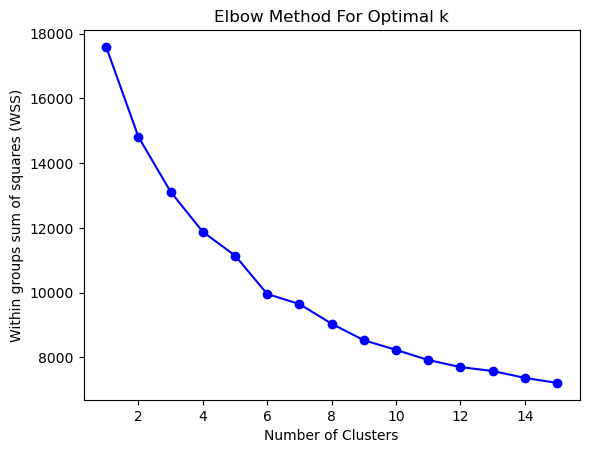

In [6]:
# Plot WSS
wss = wssplot(df_scaled, nc=15)

In [7]:
# Find optimal k using KneeLocator

kl = KneeLocator(range(1, 16), wss, curve="convex", direction="decreasing")
optimal_k = kl.elbow
print(f"Optimal number of clusters (Elbow Method): {optimal_k}")


Optimal number of clusters (Elbow Method): 6


In [8]:
# K-means Clustering

kmeans = KMeans(n_clusters=optimal_k, n_init=25, random_state=1234)
clusters = kmeans.fit_predict(df_scaled)

In [9]:
# Add cluster labels to original DataFrame
df['cluster'] = clusters + 1  # +1 to match R's 1-based cluster indexing


# Cluster sizes and centers

print("\nCluster sizes:")
print(pd.Series(clusters).value_counts())

print("\nCluster centers (scaled):")
print(kmeans.cluster_centers_)


# Cluster-wise mean of original variables

cluster_means = df.groupby('cluster').mean()
print("\nCluster-wise means (original scale):")
print(cluster_means)


Cluster sizes:
5    520
2    356
1    345
0    303
3     47
4     28
Name: count, dtype: int64

Cluster centers (scaled):
[[-4.47648523e-01 -1.59569608e-01 -2.26208884e-01 -4.02443230e-01
   1.57616765e-01 -2.36120220e-01 -1.20175583e+00  5.50261818e-01
   1.78225346e-01  1.30005453e+00  8.84178802e-01]
 [ 3.80839512e-02  5.85456983e-02 -1.05471398e-01 -4.43529352e-02
   9.31402646e-01  1.16053061e+00  2.44890423e-01 -1.12007986e-01
  -2.22904380e-01 -6.22913515e-01 -4.50329674e-01]
 [-7.07632437e-01  1.12296945e+00  7.28116489e-02  2.26335389e-03
  -5.87879983e-01 -5.54240505e-01  7.47784134e-01 -7.92006166e-01
   3.99316492e-01  1.89012458e-01  4.50848355e-01]
 [-7.04328825e-02  4.33107971e-01  4.22933594e+00  2.05786922e-01
   1.56850467e+00  1.72102704e+00  1.02299498e+00 -2.36055293e-01
   1.06349648e-01 -2.19293993e-01 -2.34373898e-01]
 [ 2.19980305e-03  1.18155266e+00 -3.89872163e-01  5.78475973e+00
  -4.95156003e-02  5.10329601e-01  1.80071833e-01 -1.73579154e+00
   3.66341219